> ## Predicting Heart Disease using Machine Learning

* 1.Definition
* 2.Data
* 3.Evaluation
* 4.Features
* 5.Modelling
* 6.Experimentation

In [1]:
# Standard Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the necessary Data

In [3]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<bound method Artist.set of <AxesSubplot:>>

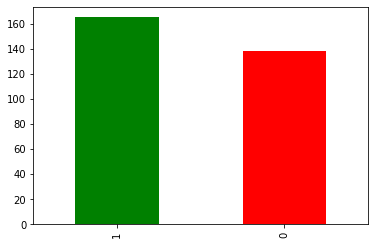

In [5]:
x = df["target"].value_counts().plot(kind = "bar",color = ["green" , "red"])
x.set

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [4]:
 # compare sex vs target
    
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


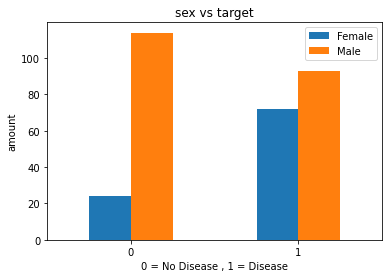

In [5]:
pd.crosstab(df["target"],df["sex"]).plot(kind ="bar")
plt.title("sex vs target")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

In [12]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["thalach"].value_counts()


162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

### Age vs thalach vs target

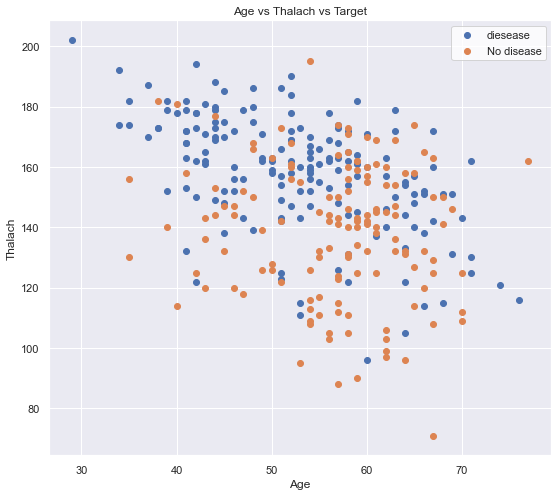

In [65]:
fig,ax = plt.subplots(figsize = (9,8))
sns.set_style("white")
ax.scatter(df["age"][df["target"]==1],df["thalach"][df["target"]==1],cmap="winter")
ax.scatter( df.age[df.target ==0],df.thalach[df.target ==0],cmap="winter");
plt.title("Age vs Thalach vs Target")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["diesease","No disease"]);




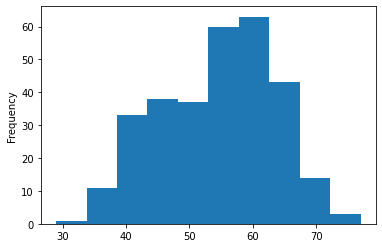

In [15]:
# Distribution of age

df["age"].plot.hist();

In [6]:
### Target vs Chest Pain

x = pd.crosstab(df.cp,df.target)
x["percentage"] = (x[1]/ (x[0]+x[1]))*100
x.drop(columns = "percentage",inplace = True)
x

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


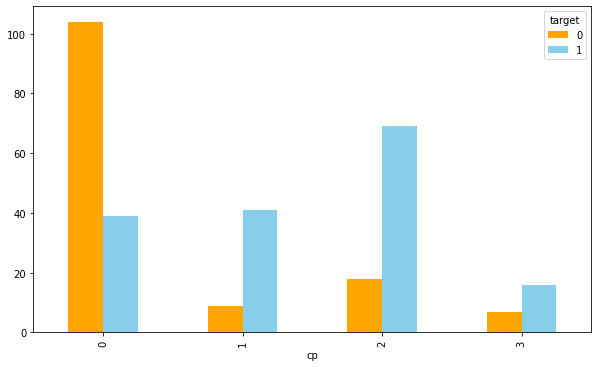

In [16]:
x.plot(kind = "bar",figsize = (10,6),color = ["orange","skyblue"]);

In [3]:
### Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


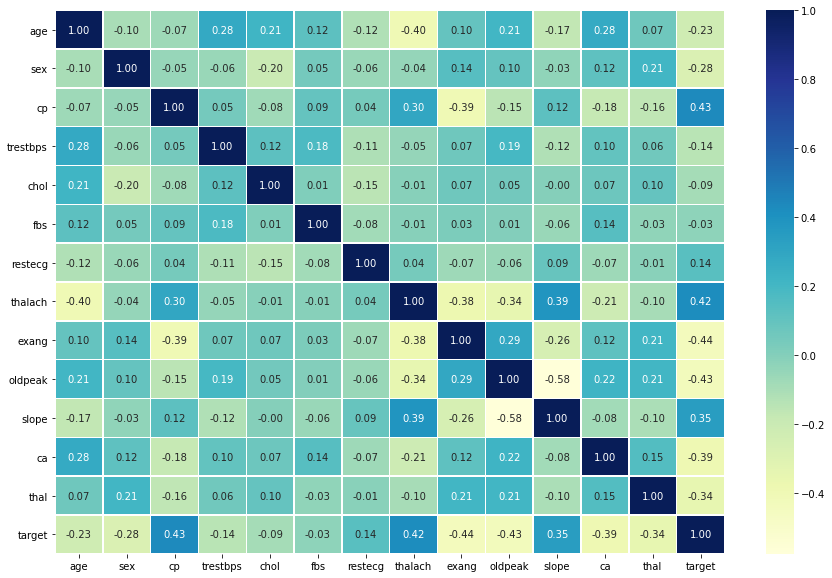

In [4]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot = True,linewidth = 0.5,fmt=".2f",cmap="YlGnBu")

## 5.Modelling

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = df.drop("target",axis = 1)
y = df["target"]


In [6]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



models ={"LR":LogisticRegression(),
        "KNN": KNeighborsClassifier(),
         "RF": RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for model in models:
        models[model].fit(X_train,y_train)
        model_scores[model] =models[model].score(X_test,y_test)
        
    return model_scores    
        
    
    

In [10]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\Admin\Desktop\ML_Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RF': 0.8360655737704918}

In [37]:
x=[]
z=[]
for i in model_scores:
    x.append(i)
    z.append(model_scores[i])
x
z

[0.8852459016393442, 0.6885245901639344, 0.8360655737704918]

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\Desktop\ML_Project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


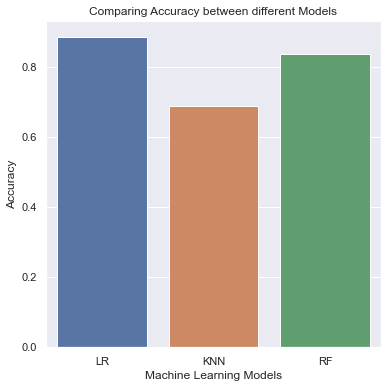

In [58]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x,z)
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Models")
plt.title("Comparing Accuracy between different Models")
plt.show()

## Tuning the model

In [12]:
#KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))
    
    



In [13]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

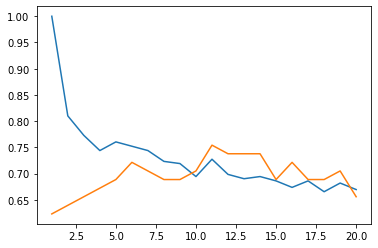

In [14]:
plt.plot(neighbors,train_scores)
plt.plot(neighbors,test_scores);

In [15]:
max(train_scores)

1.0

In [16]:
max(test_scores)

0.7540983606557377

In [17]:
np.logspace(-4,4,20)


array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

## Hyperparameter tuning with Randomized Search CV

In [18]:
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

rf_grid = {"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}


In [19]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid
                               ,cv=5,n_iter=20,verbose = True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [21]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## Gridsearch CV


In [22]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {"C":np.logspace(-4,4,30),"solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv = 5,verbose = True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [23]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442